In [1]:
%%capture
! pip install bayesian-optimization==1.1.0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/graphite/keyword_category_prediction_api

/content/drive/MyDrive/graphite/keyword_category_prediction_api


In [12]:
from bayes_opt import BayesianOptimization
from modeling.baseline_models.hyperparameters.support_vector_machine import evaluate_model
from modeling.baseline_models.hyperparameters.plots.gaussian_process_plot import plot_gp

# For loading progress
from bayes_opt.util import load_logs

import json

# Get category names


In [13]:
with open("config.json") as json_file:
    config = json.load(json_file)

# Load logs

In [17]:
for category_idx in range(len(config['CLASS_NAMES'])):
  print(f"\n\nOptimal hyperparameters for category: {config['CLASS_NAMES'][category_idx]}\n")

  # Bounded region of parameter space
  pbounds = {
    'category': (0, 0 + 0.1),
    'C': (1e-5, 100),
    'max_iter': (10, 10000),
    'class_weight': (0, 1),
    'vectorizer_selection': (0, 1),
    'strip_accents': (0, 1),
    'lowercase': (0, 1),
    'ngram_range': (0, 1),
    'english': (0, 1),
    'italian': (0, 1),
    'french': (0, 1),
    'spanish': (0, 1),
    'dutch': (0, 1),
    'romanian': (0, 1),
    'danish': (0, 1),
    'norwegian': (0, 1),
    'german': (0, 1),
    'swedish': (0, 1),
    'portuguese': (0, 1),
    'finnish': (0, 1),
    'alphanumeric': (0, 1),
    'punctuation_and_lower_cased': (0, 1),
    'new_lines': (0, 1),
    'non_ascii': (0, 1),
}



  optimizer = BayesianOptimization(
      f=evaluate_model,
      pbounds=pbounds,
      verbose=2,  # verbose=1 prints only when a max is observed
      random_state=1,
  )

  load_logs(optimizer, logs=[f"hyperparameter_optimization/support_vector_machine/logs/logs_{config['CLASS_NAMES'][category_idx].lower().replace(' ', '_')}.json"])

  print(optimizer.max, '\n')



Optimal hyperparameters for category: Health

{'target': -2.5431775704299673, 'params': {'C': 41.70220630003735, 'alphanumeric': 0.7203244934421581, 'category': 1.1437481734488664e-05, 'class_weight': 0.30233257263183977, 'danish': 0.14675589081711304, 'dutch': 0.0923385947687978, 'english': 0.1862602113776709, 'finnish': 0.34556072704304774, 'french': 0.39676747423066994, 'german': 0.538816734003357, 'italian': 0.4191945144032948, 'lowercase': 0.6852195003967595, 'max_iter': 10.204452249731517, 'new_lines': 0.8781174363909454, 'ngram_range': 0.027387593197926163, 'non_ascii': 0.6704675101784022, 'norwegian': 0.41730480236712697, 'portuguese': 0.5586898284457517, 'punctuation_and_lower_cased': 0.14038693859523377, 'romanian': 0.1981014890848788, 'spanish': 0.8007445686755367, 'strip_accents': 0.9682615757193975, 'swedish': 0.31342417815924284, 'vectorizer_selection': 0.6923226156693141}} 



Optimal hyperparameters for category: Vehicles

{'target': -1.791988482513868, 'params': {'C'

# Gaussian process

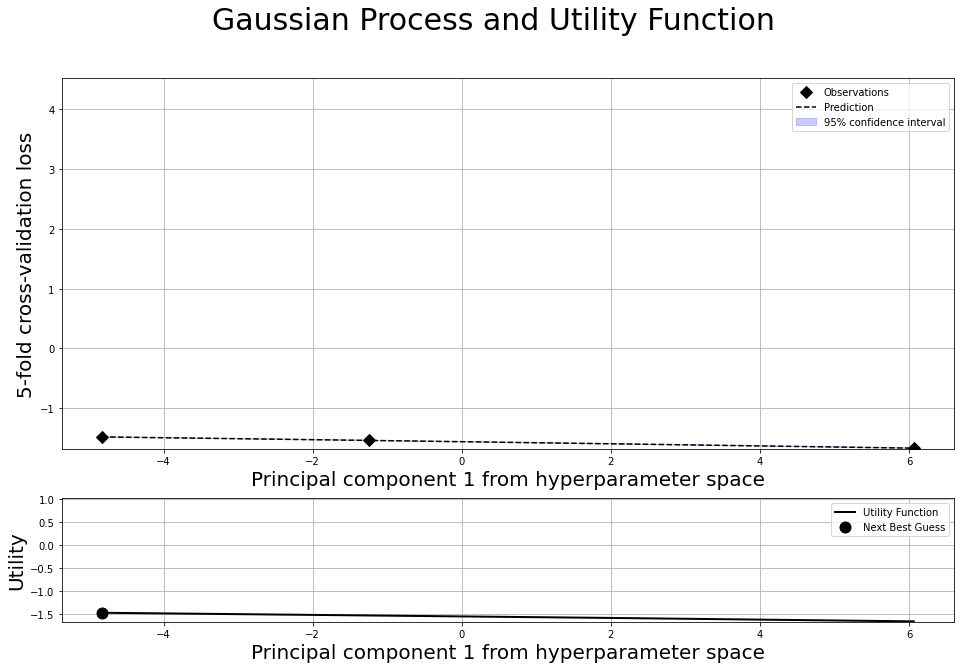

In [18]:
plot_gp(optimizer, axis_color='black', fc_color='b', ec_color='b', alpha=.2)